In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

import mu_avg.mu_avg as mu_avg

Welcome to JupyROOT 6.12/04


In [2]:
filename = 'hdf5/60hr.h5'
tr_interp_df = pd.read_hdf(filename, key='tr_df_2')
tr_moment_df = helper.calc_moment_df(tr_interp_df)

Finished calculating all moments for 4363 events.


In [5]:
# look at blocks of N measurements at a time, look at the trolley moments
# fit a polynomial, take the residuals, take the rms of the residuals as the "noise"

N = 10
ii = range(0,tr_moment_df.shape[0]//N)

m=3
trm = 'tr,m'+str(m)

deg = 4

bin_times = []
devs = []

for i in ii:
# for i in [7]:
    block = range(i*N, i*N+N)
    
    times = tr_moment_df.iloc[block].index.values
    t0 = times[0]
    times = times-t0
    
    moments = tr_moment_df[trm].iloc[block].values
    
    coeffs = np.polyfit(times,moments,deg)
    resids = moments - np.polyval(coeffs, times)
    
    bin_times.append(int(np.mean(times)+t0))
    devs.append(np.std(resids))
    
    
    
# final block

block = range(ii[-1]*N+N, tr_moment_df.shape[0])

times = tr_moment_df.iloc[block].index.values
t0 = times[0]
times = times-t0

moments = tr_moment_df[trm].iloc[block].values

coeffs = np.polyfit(times,moments,deg)
resids = moments = np.polyval(coeffs, times)

bin_times.append(int(np.mean(times)+t0))
devs.append(np.std(resids))

bin_times = np.array(bin_times)
devs = np.array(devs)

/home/aetb/.local/lib/python2.7/site-packages/ipykernel_launcher.py:43: RankWarning: Polyfit may be poorly conditioned


0.16179919854228872


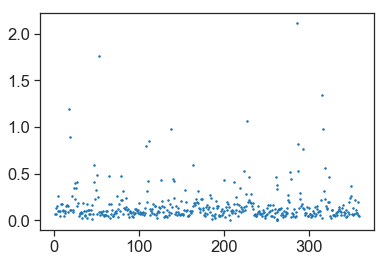

In [4]:
print np.mean(devs)/61.79

fig, ax = plt.subplots(1,1)

ax.plot(tr_moment_df['tr_phi'].loc[bin_times], np.array(devs)/61.79, '.', markersize=3)
# ax2 = ax.twinx()
# ax2.plot(tr_moment_df_1['tr_phi'], tr_moment_df_1['tr,m1'], '.', color='C1', markersize=3)